1. Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

Took the dot product formula, solved for theta (angle)

In [34]:
import numpy as np
import numpy.linalg as lin

def angle_between(v1, v2):
    for i,n in zip(v1, v2):
        len_v1 = v1 / np.linalg.norm(v1)
        len_v2 = v2 / np.linalg.norm(v2)
        dotprod = np.dot(len_v1, len_v2)
        angle = np.arccos(dotprod)
        
    return angle

a = [5, 9]
b = [1, 3]

angle_between(a, b)

0.18534794999569545

2. Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

Used Python indexing/slicing to define r1 and r2.

In [31]:
def row_dot(A):
    for r1, r2 in A:
        r1 = A[0]
        r2 = A[1]
        dot_prod = r1*r2
        
    return dot_prod
    

Q = np.array([[1, 3], [5, 7]])


row_dot(Q)

array([ 5, 21])

3. Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

Like matrix multiplication, matrices must have same shape in order for division to work.  And as was drilled repeatedly into our heads by many math teachers, you can't divide by zero - so m2 cannot have a zero value.

In [33]:
def matrix_division(m1, m2):
    quotient = np.divide(m1, m2)
 
    return quotient

c = np.array([[2, 4], [6, 8]])
d = np.array([[9, 7], [5, 3]])
matrix_division(c, d)

array([[0.22222222, 0.57142857],
       [1.2       , 2.66666667]])

4. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

Not gonna lie, I don't quite comprehend this whole tolerance thing enough to provide an explanation. ¯\_(ツ)_/¯

In [39]:
import math

def is_orthogonal(v1,v2, tol):
    for i,n in zip(v1, v2):
        len_v1 = v1 / np.linalg.norm(v1)
        len_v2 = v2 / np.linalg.norm(v2)
        dotprod = np.dot(len_v1, len_v2)
        angle = np.arccos(dotprod)
        tol > 0
        
        if ((math.pi)/2 - angle) < tol:
            print(1)
        else:
            print(0)
        
a = np.array([1, 0.001])
b = np.array([0.001, 1])
toll = .02

is_orthogonal(a, b, toll)

1
1


5. Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [60]:
class vector_calculator:
    def __init__(self, v1, v2):
        self.v1 = v1
        self.v2 = v2
        
    def angle_between(v1, v2):
        for i,n in zip(v1, v2):
            len_v1 = v1 / np.linalg.norm(v1)
            len_v2 = v2 / np.linalg.norm(v2)
            dotprod = np.dot(len_v1, len_v2)
            angle = np.arccos(dotprod)
        
        return angle


    def is_orthogonal(v1,v2, tol):
        for i,n in zip(v1, v2):
            len_v1 = v1 / np.linalg.norm(v1)
            len_v2 = v2 / np.linalg.norm(v2)
            dotprod = np.dot(len_v1, len_v2)
            angle = np.arccos(dotprod)
            tol > 0
        
            if ((math.pi)/2 - angle) < tol:
                print(1)
            else:
                print(0)

6. Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. 

Principal components are the result of transforming a large dataset with lots of dimensions into a smaller dataset with fewer dimensions.  The smaller dataset still contains most of the information of its parent dataset, though some accuracy does get lost along the way.  Why do this?  Smaller datasets are easier to explore, analyze, and manipulate - not only for humans, but also for machine learning algorithms.

In [40]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data

breast_data.shape

(569, 30)

In [42]:
breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [51]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [47]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [48]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [50]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


<Figure size 432x288 with 0 Axes>

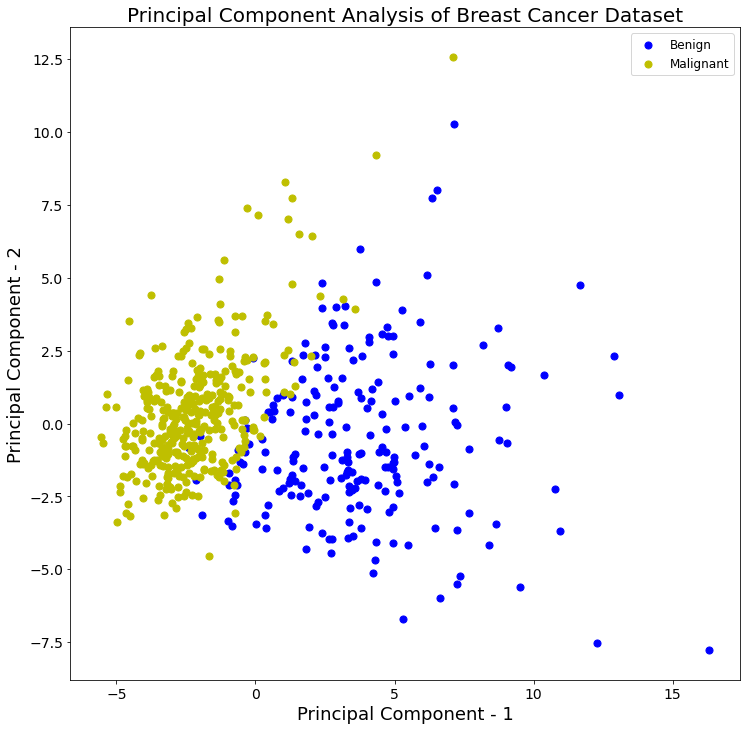

In [61]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(12,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=18)
plt.ylabel('Principal Component - 2',fontsize=18)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 12})